# **Problem Statement**

##Context

An automobile parts manufacturing company has been actively selling products to a diverse range of customers for the past three years. Despite its growth, the company lacks the in-house expertise to derive actionable insights from its transaction data. As a result, they wish to uncover hidden patterns and trends in their customer transactions. By analyzing this data, the company aims to better understand customer behavior, improve customer segmentation, and implement targeted marketing strategies. These insights will help the company not only enhance customer satisfaction but also drive revenue growth by offering more personalized and efficient services.

##Objective

The primary objective of this analysis is to leverage data science techniques to:

Identify underlying patterns in customer purchasing behavior.
Segment customers based on their transactional data.
Provide actionable insights to optimize the company's marketing efforts.
Recommend personalized marketing strategies for each customer segment to maximize sales and customer retention.
Your role as a Business Analyst is to use the provided dataset to achieve these goals and present findings in a manner that can guide the company's decision-making.

##Data Description


Data Description:
The dataset provided contains three years of transactional data from the company, with each row representing a unique order. Below is an explanation of the key attributes:

* ORDERNUMBER: Unique identifier for each order.
* QUANTITYORDERED: Number of items ordered in a specific transaction.
* PRICEEACH: Price per unit of the product in the order.
* ORDERLINENUMBER: Sequence number of the product in the order.
* SALES: Total sales value for the order.
* ORDERDATE: Date when the order was placed.
* DAYS_SINCE_LASTORDER: Number of days since the customer's previous order.
* STATUS: Current status of the order (e.g., Shipped, Disputed).
* PRODUCTLINE: Product category to which the item belongs (e.g., Motorcycles, Classic Cars).
* MSRP: Manufacturer’s Suggested Retail Price for the product.
* PRODUCTCODE: Unique identifier for the product.
* CUSTOMERNAME: Name of the customer placing the order.
* PHONE: Customer's contact phone number.
* ADDRESSLINE1: Customer's primary address.
* CITY: City of the customer's address.
* POSTALCODE: Postal code of the customer's address.
* COUNTRY: Country of the customer's address.
* CONTACTLASTNAME: Last name of the customer’s contact person.
* CONTACTFIRSTNAME: First name of the customer’s contact person.
* DEALSIZE: Size category of the transaction (e.g., Small, Medium, Large).

# **Importing the necessary libraries**

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Read the data
df = pd.read_excel('/content/drive/MyDrive/PGPDSA/Sales_Data.xlsx')
#returns first 5 rows
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70000,2,2871.00000,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35000,5,2765.90000,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74000,2,3884.34000,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26000,6,3746.70000,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66000,1,3479.76000,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


# **Data Overview**

###1. Structure of Data

In [5]:
df.shape

(2747, 20)

###2. Type of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

###3. Missing values treatment

In [7]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


###4. Data Duplicates

In [8]:
df.duplicated().sum()

0

###5. Preprocessing

In [35]:
max_order_date = df['ORDERDATE'].max()

# Calculate days difference
df['NoOfDaysSincelastOrder'] = (max_order_date - df['ORDERDATE']).dt.days

###6. Statistical Summary

In [36]:
df[['QUANTITYORDERED','PRICEEACH','SALES','NoOfDaysSincelastOrder','MSRP']].describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.00000,35.10302,9.76214,6.00000,27.00000,35.00000,43.00000,97.00000
PRICEEACH,2747.00000,101.09895,42.04255,26.88000,68.74500,95.55000,127.10000,252.87000
SALES,2747.00000,3553.04758,1838.95390,482.13000,2204.35000,3184.80000,4503.09500,14082.80000
NoOfDaysSincelastOrder,2747.00000,383.08591,230.23130,0.00000,196.00000,342.00000,570.00000,876.00000
MSRP,2747.00000,100.69166,40.11480,33.00000,68.00000,99.00000,124.00000,214.00000


##Insights

* The average quantity ordered per transaction is 35 items, with 50% of the orders involving between 27 and 43 items.
* The price per unit averages 101.10, with prices ranging from 26.88 to 252.87 and 50% of prices between 68.75 and 127.10.
* The average sales value per order is 3,553.05, with total sales ranging from 482.13 to 14,082.80 and 50% of sales between 2,204.35 and 4,503.10.
* The average number of days since the last order is approximately 383 days, with a range from 0 to 876 days. Half of the intervals fall between 196 and 570 days.
* The average Manufacturer’s Suggested Retail Price (MSRP) is 100.69, with prices spanning 33 to 214 and 50% of products priced between 68 and 124.

# **Exploratory Data Analysis**

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}')

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    ax.set_title(f'Distribution of {feature}')
    plt.show()  # show the plot

In [12]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Stacked Bar Plot of {predictor} vs {target}')
    plt.show()

In [13]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Distribution and Boxplots of {predictor} with respect to {target}', fontsize=16)


    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

##Univariate Analysis

###Observation on Sales

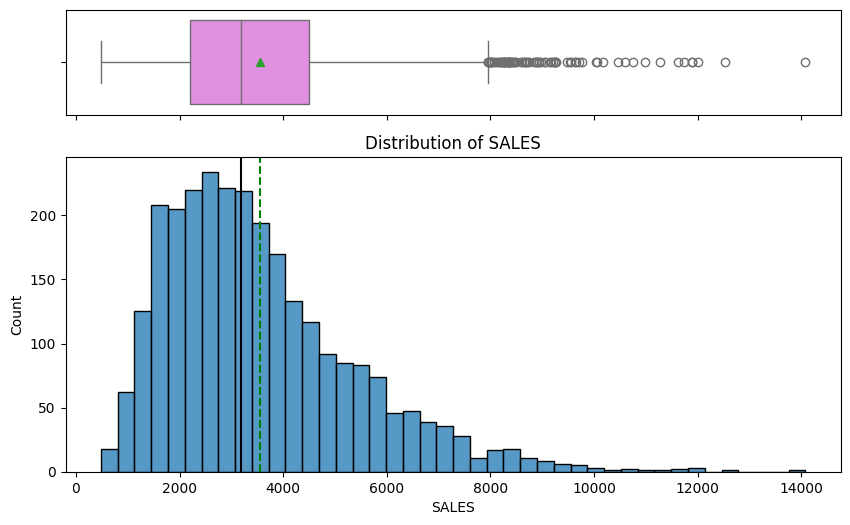

In [15]:
histogram_boxplot(df, "SALES",figsize=(10,6))

###Observation on Quantity ordered


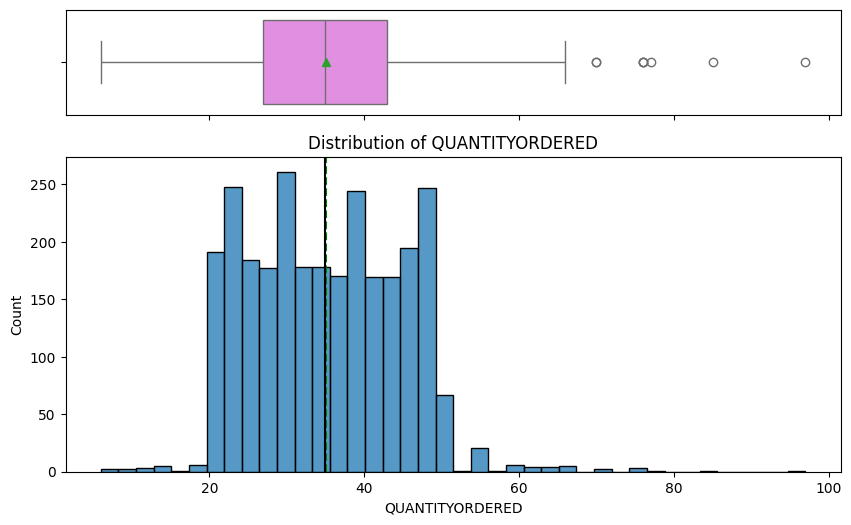

In [16]:
histogram_boxplot(df, "QUANTITYORDERED",figsize=(10,6))

###Observation on PRICEEACH

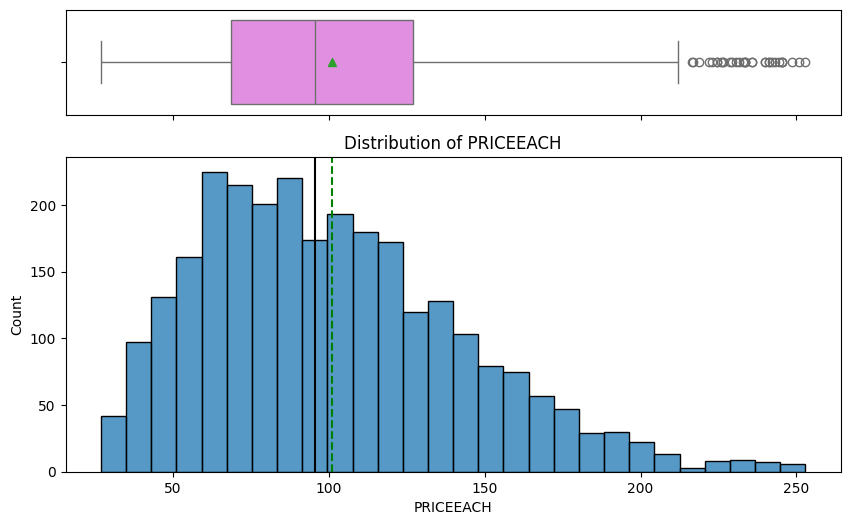

In [17]:
histogram_boxplot(df, "PRICEEACH",figsize=(10,6))

### Observation on DAYS_SINCE_LASTORDER

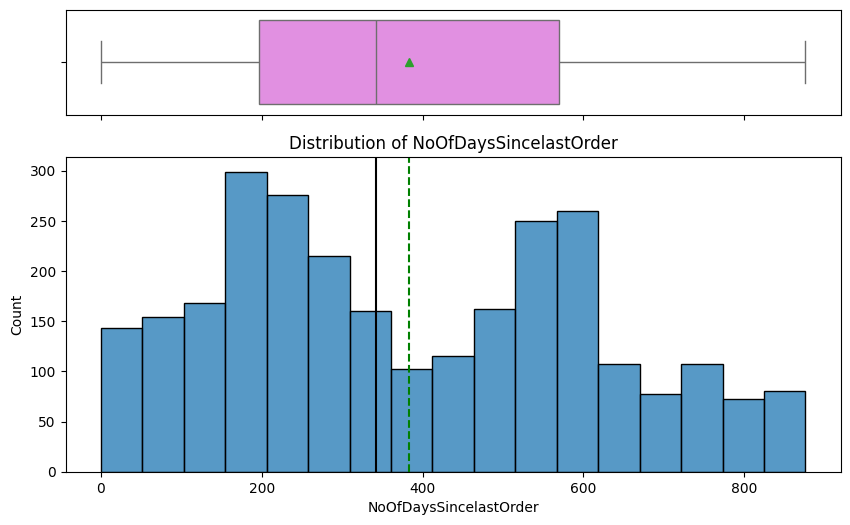

In [37]:
histogram_boxplot(df, "NoOfDaysSincelastOrder",figsize=(10,6))

###Observation on MSRP

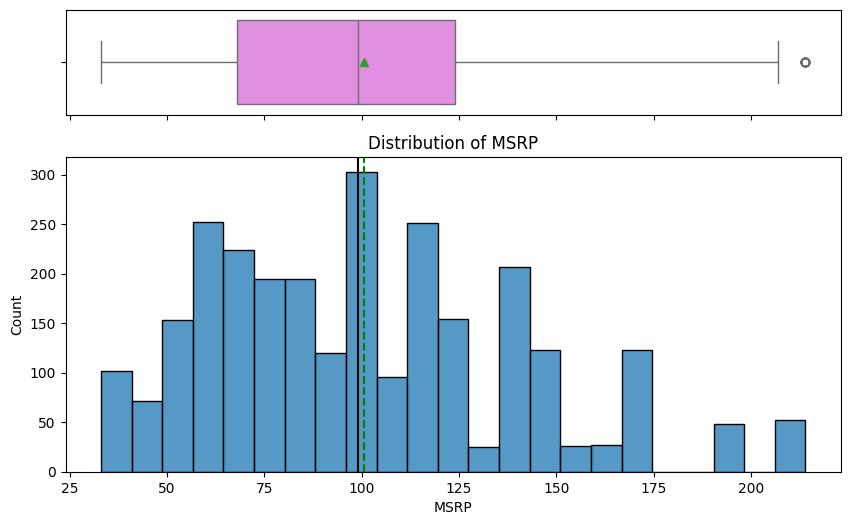

In [22]:
histogram_boxplot(df, "MSRP",figsize=(10,6))

###Observation on order status

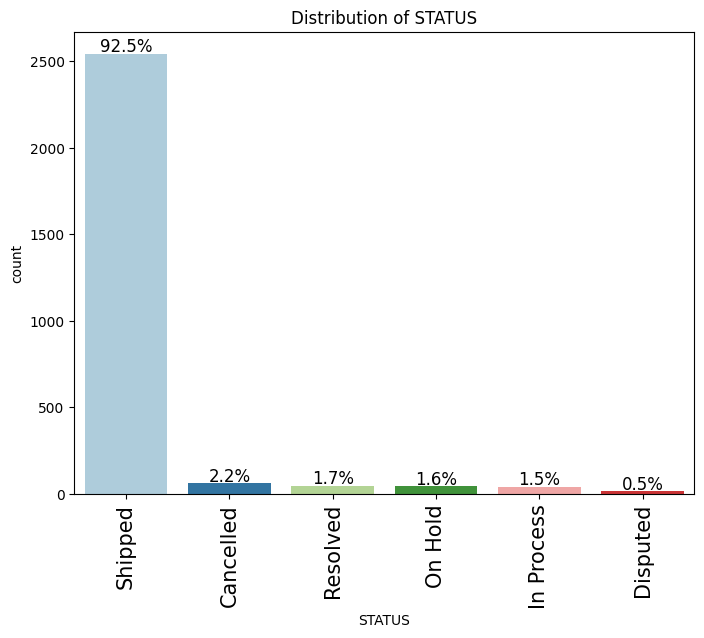

In [21]:
labeled_barplot(df, "STATUS", perc=True)

###Observation on Country

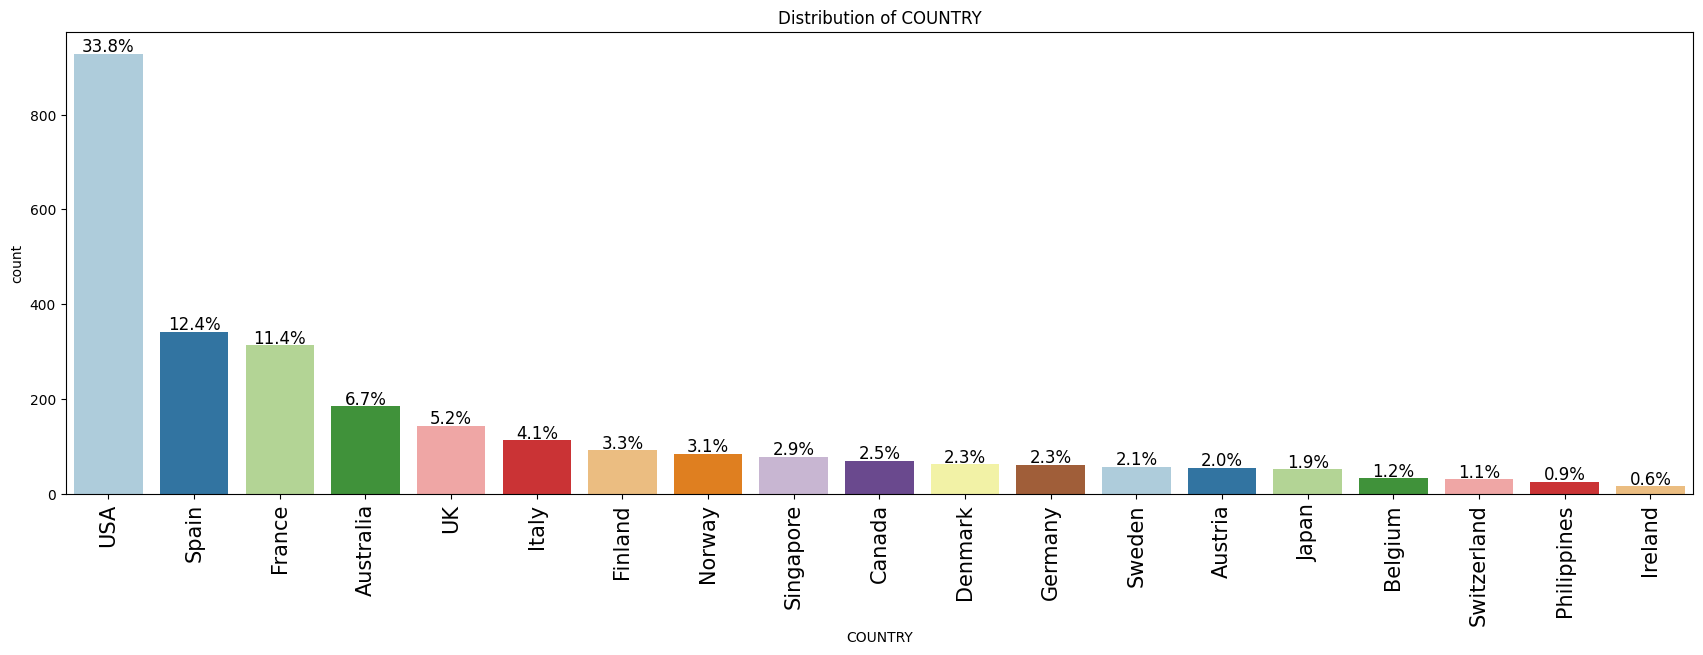

In [24]:
labeled_barplot(df, "COUNTRY", perc=True)

##Bivariate Analysis

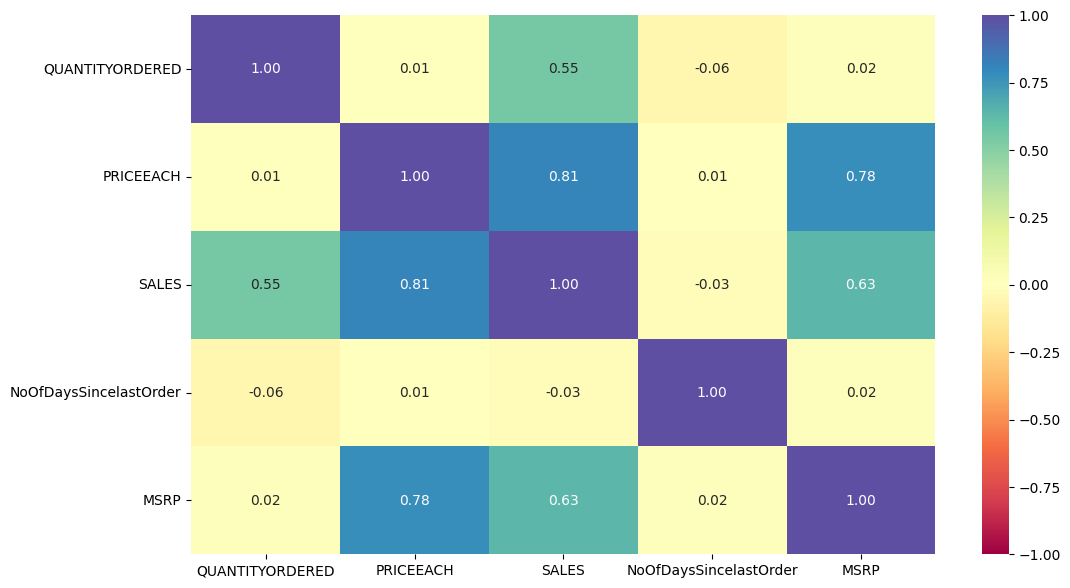

In [38]:
cols_list = ['QUANTITYORDERED','PRICEEACH','SALES','NoOfDaysSincelastOrder','MSRP']

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##Insights

* Price and Sales are Strongly Linked (0.81) - There's a very strong positive correlation between PRICEEACH and SALES, suggesting that higher-priced items are major revenue drivers. This could indicate either a luxury-focused business model or that the company's premium products are particularly successful in the market.
* Pricing Follows MSRP Guidelines (0.78) - The strong correlation between PRICEEACH and MSRP shows that the business maintains consistent pricing relative to manufacturer suggestions. This indicates disciplined pricing practices and potentially healthy profit margins.
* NoOfDaysSinceLastOrder shows almost no correlation with other variables (all near 0.01-0.02). This suggests that ordering patterns are independent of price, quantity, and sales.
* Quantity Independence (0.01-0.55) - QUANTITYORDERED shows surprisingly weak correlations with most metrics except for a moderate relationship with SALES (0.55). This suggests that order quantities are determined by factors not captured in this dataset, such as perhaps inventory policies or customer-specific needs.


In [39]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'NoOfDaysSincelastOrder'],
      dtype='object')

###Sales vs Quantity Ordered

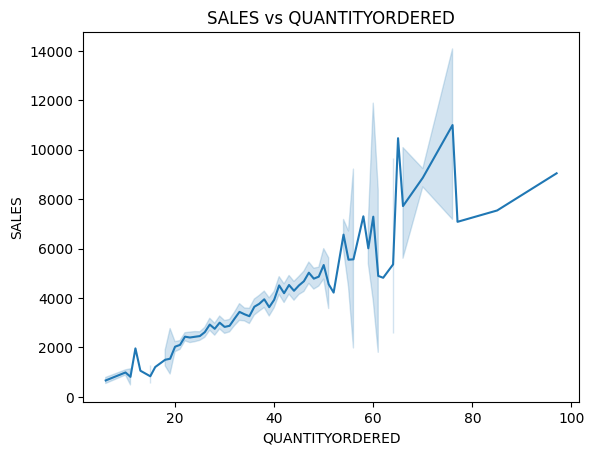

In [29]:
sns.lineplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.title('SALES vs QUANTITYORDERED')
plt.show()

###Sales vs Price Each

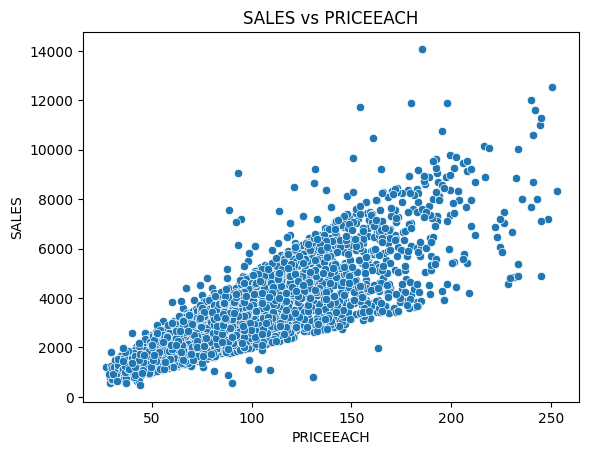

In [31]:
sns.scatterplot(x='PRICEEACH', y='SALES', data=df)
plt.title('SALES vs PRICEEACH')
plt.show()

###Sales vs DAYS_SINCE_LASTORDER

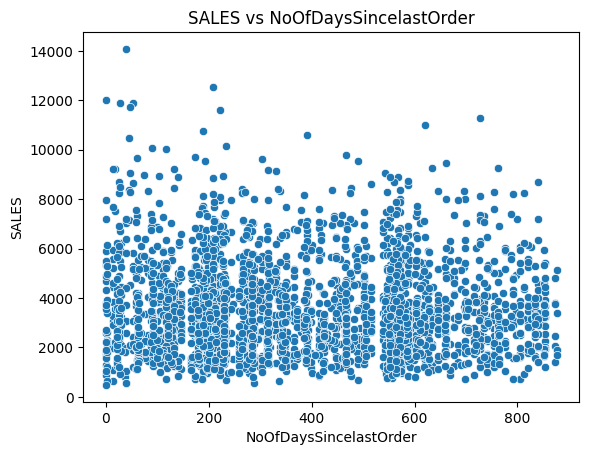

In [40]:
sns.scatterplot(x='NoOfDaysSincelastOrder', y='SALES', data=df)
plt.title('SALES vs NoOfDaysSincelastOrder')
plt.show()